In [9]:
import sys
import os
import importlib

import numpy as np
import pandas as pd
from scipy import optimize as opt
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.lines import Line2D
from matplotlib.patches import Ellipse
import proplot as plot
import seaborn as sns
from tqdm import tqdm
from tqdm import trange

sys.path.append('../../../')
from tools import animation as myanim
from tools import beam_analysis as ba
from tools import plotting as myplt
from tools import utils

sys.path.append('../../')
from data_analysis import to_vec, to_mat, reconstruct
from data_vis import reconstruction_lines

In [10]:
plot.rc['figure.facecolor'] = 'white'
plot.rc['savefig.dpi'] = 'figure'
plot.rc['animation.html'] = 'jshtml'
plot.rc['grid.alpha'] = 0.04
plot.rc['axes.grid'] = False

# 4D emittance measurement errors

In [11]:
Sigmas = np.load('_output/data/Sigmas.npy')
Sigmas *= 1e6

In [12]:
emittances = []
for Sigma in Sigmas:
    eps_1, eps_2 = ba.intrinsic_emittances(Sigma)
    eps_x, eps_y = ba.apparent_emittances(Sigma)
    emittances.append([eps_x, eps_y, eps_1, eps_2])
emittances = np.array(emittances)

In [13]:
# fig, ax = plot.subplots(figsize=(3.5, 3), aspect=1)
# h = ax.hist2d(emittances[:, 0], emittances[:, 1], cmap='viridis');
# ax.colorbar(h[3])
# ax.format(title='Apparent emittances',
#           xlabel=r'$\varepsilon_x$ [mm mrad]',
#           ylabel=r'$\varepsilon_y$ [mm mrad]')

In [14]:
# fig, ax = plot.subplots(figsize=(3.5, 3), aspect=1)
# h = ax.hist2d(emittances[:, 2], emittances[:, 3], cmap='viridis');
# ax.colorbar(h[3])
# ax.format(title='Intrinsic emittances',
#           xlabel=r'$\varepsilon_x$ [mm mrad]',
#           ylabel=r'$\varepsilon_y$ [mm mrad]')

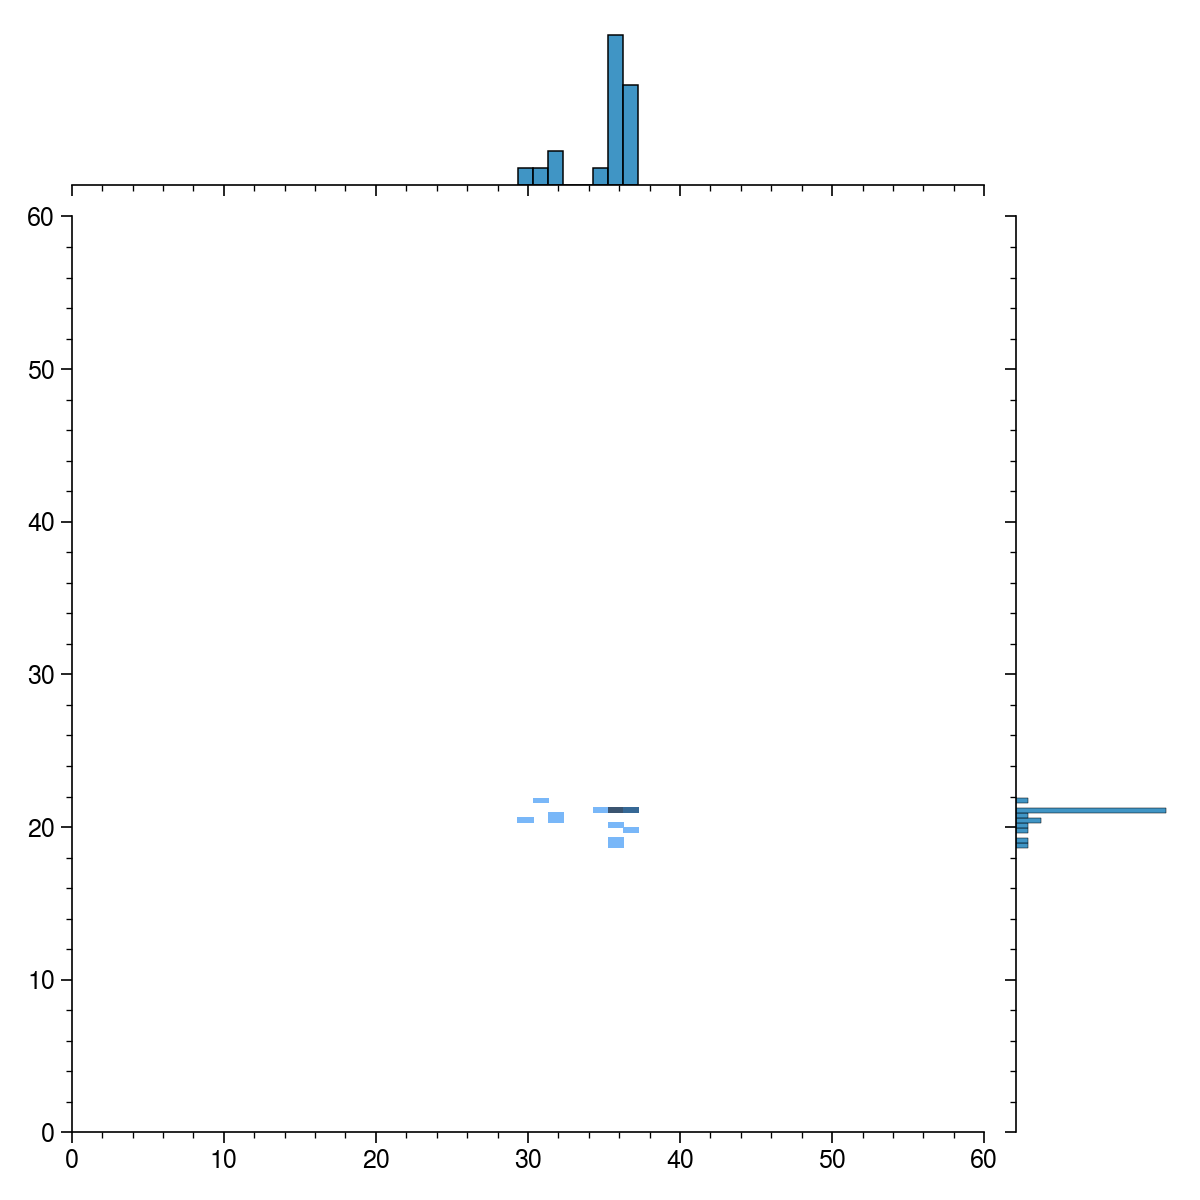

In [24]:
sns.jointplot(x=emittances[:, 0], y=emittances[:, 1], kind='hist',
              bins='auto', xlim=(0, 60), ylim=(0, 60));

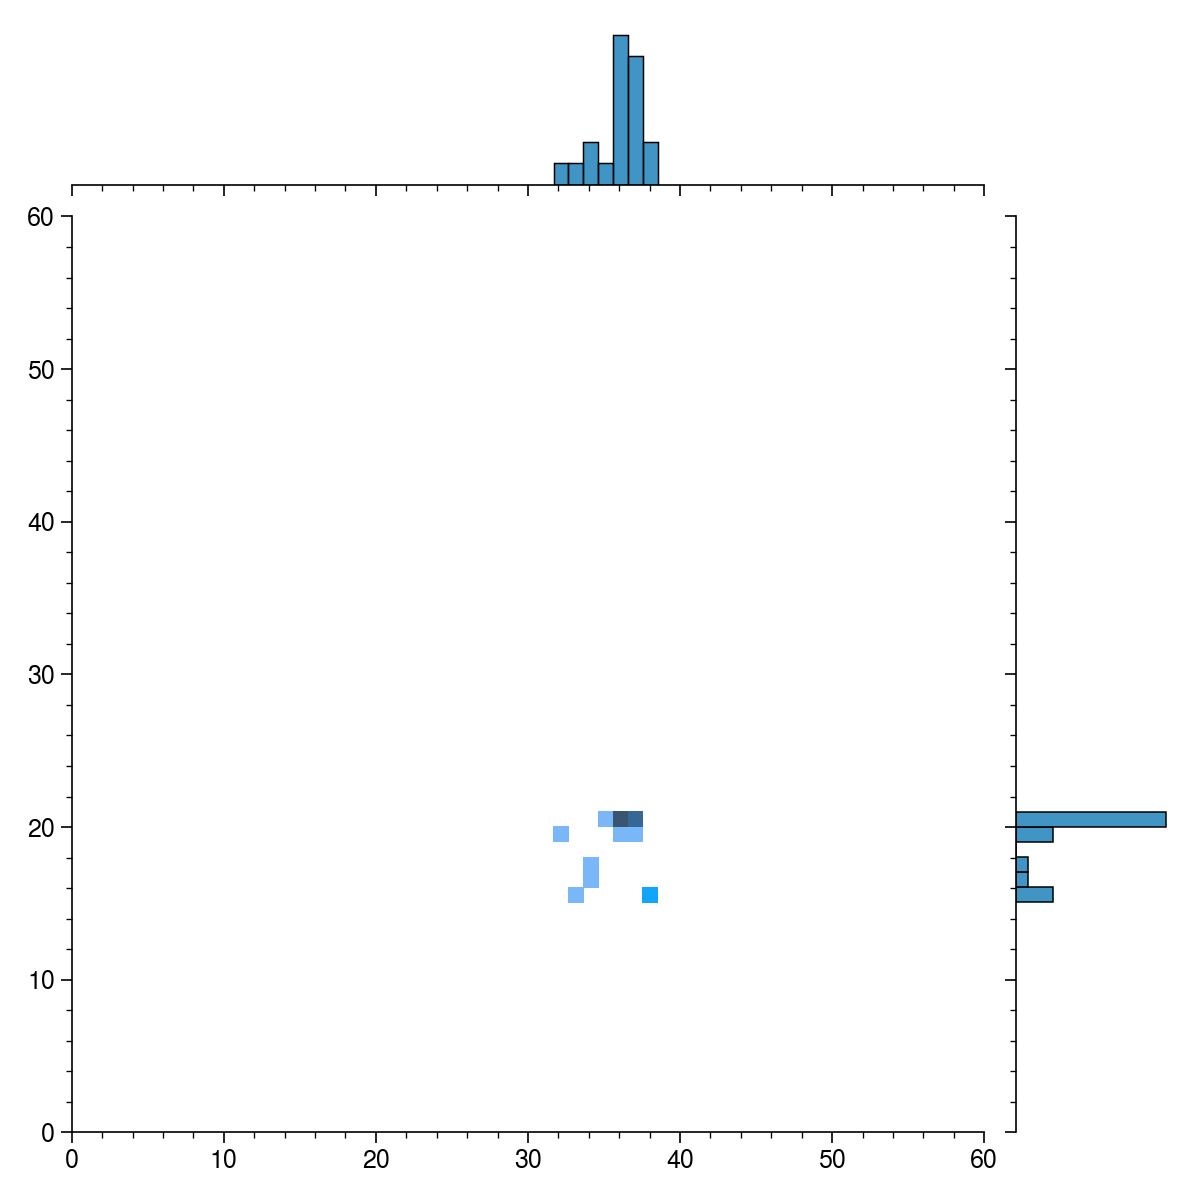

In [25]:
sns.jointplot(x=emittances[:, 2], y=emittances[:, 3], kind='hist',
              bins='auto', xlim=(0, 60), ylim=(0, 60));